# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [2]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Somos analistas de dados de um e-commerce com três bases: clientes, vendas de 2023 e clientes pré-cadastrados no Zoop Pay.

Primeiro, una as bases "vendas" e "clientes" em um DataFrame chamado `df` usando `ID_compra` como chave e organize as colunas na seguinte ordem:

\["ID\_compra", "data", "horario", "categoria", "preco\_unitario", "quantidade", "frete", "metodo\_pagamento", "ID\_cliente", "idade", "sexo\_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao\_compra"]

In [3]:
import pandas as pd

In [4]:
# Lendo os arquivos CSV
df_vendas = pd.read_csv(url_vendas)
df_clientes = pd.read_csv(url_clientes)

# Realizando o merge dos DataFrames
df = pd.merge(df_vendas, df_clientes, on="ID_compra")

# Organizando as colunas na sequência especificada
colunas_ordenadas = ["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

- Agora vamos juntar o DataFrame "df" com a base `zoop_pay`, usando a coluna `ID_cliente` como chave. Também precisamos transformar a coluna data para o formato `datetime`, pois está no padrão `YYYY-MM-DD`

In [5]:
# Substitua url_zoop_pay pela URL real fornecida para a base zoop_pay
zoop_pay = pd.read_csv(url_zoop_pay)

# Unindo o DataFrame df com a base zoop_pay utilizando a coluna "ID_cliente"
df = pd.merge(df, zoop_pay, on="ID_cliente")

# Ajustando a coluna "data" para o formato datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra,zoop_pay
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,Porto Alegre,Rio Grande do Sul,Sul,30,Masculino,Sim,10,Não
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,São Paulo,São Paulo,Sudeste,36,Masculino,Sim,8,Sim
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,Porto Velho,Rondônia,Norte,39,Feminino,Não,7,Não
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,Recife,Pernambuco,Nordeste,35,Masculino,Sim,9,Sim
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,São Paulo,São Paulo,Sudeste,50,Masculino,Não,9,Não


## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Precisamos gerar um gráfico de colunas que represente o faturamento por região da empresa Zoop, utilizando um DataFrame chamado **"df"**. O faturamento deve ser calculado da seguinte forma:  

- Multiplicamos o **preço unitário** pelo **número de unidades vendidas** e, em seguida,  
- Somamos o **frete** pago na transação.  

As colunas disponíveis no DataFrame são:  
- **regiao** → Indica a localização do cliente  
- **preco_unitario** → Valor de cada unidade do produto  
- **quantidade** → Número de unidades vendidas  
- **frete** → Custo de envio total da compra  

Utilize bibliotecas de visualização de dados do Python para criar um gráfico que apresente claramente esse faturamento por região.  

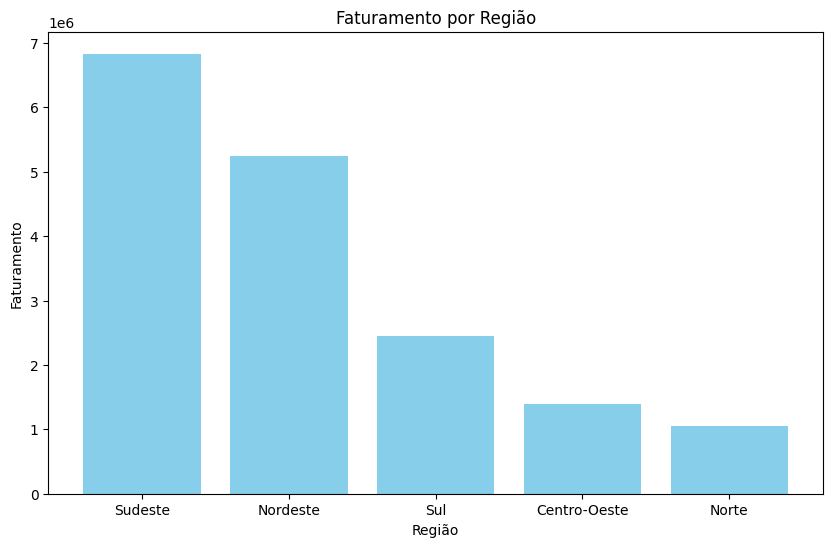

In [6]:
import matplotlib.pyplot as plt

# Calcula o faturamento para cada transação
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupa os dados por região e soma o faturamento
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordena o resultado para melhor visualização
faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color='skyblue')  # Plota o gráfico de barras
plt.title('Faturamento por Região')  # Adiciona título ao gráfico
plt.xlabel('Região')  # Adiciona rótulo ao eixo X
plt.ylabel('Faturamento')  # Adiciona rótulo ao eixo Y
plt.show()  # Exibe o gráfico

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Precisamos construir um **gráfico de colunas empilhadas** que ilustre a distribuição de pessoas por **sexo biológico** nos estados de **São Paulo** e **Rio de Janeiro**, utilizando um DataFrame chamado **"df"**.  

Para isso, consideramos as seguintes colunas:  
- **uf** → Estado do cliente (apenas São Paulo e Rio de Janeiro)  
- **sexo_biologico** → Sexo biológico do cliente  

O objetivo da visualização é apresentar **a quantidade de pessoas** agrupadas por sexo biológico dentro de cada estado, garantindo uma compreensão clara da composição desse público.  

Utilize bibliotecas de visualização de dados do Python para representar esses dados de maneira intuitiva. 

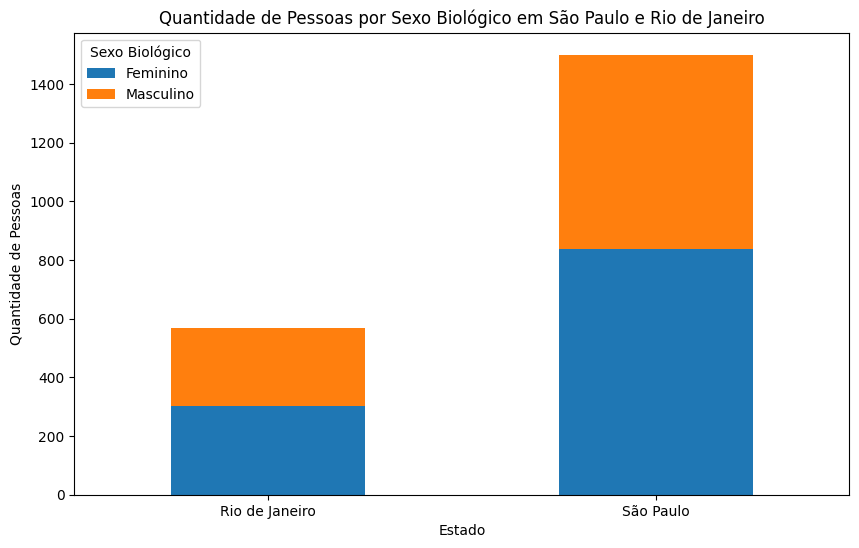

In [7]:
# Filtrar o DataFrame para incluir apenas os estados de "São Paulo" e "Rio de Janeiro"
df_filtrado = df[df['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contar a quantidade de pessoas por sexo biológico e estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

# Criar o gráfico de colunas empilhadas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Pessoas por Sexo Biológico em São Paulo e Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=0)  # Mantém os rótulos dos estados na horizontal para melhor legibilidade

# Mostrar a legenda e o gráfico
plt.legend(title='Sexo Biológico')
plt.show()

## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos criar uma **visualização gráfica** para analisar a proporção de usuários que realizaram o **pré-cadastro na Zoop Pay**, utilizando um **gráfico de rosca**.  

A informação está armazenada na coluna **"zoop_pay"** do DataFrame **"df"**, onde cada entrada indica se o usuário já realizou o pré-cadastro ou não.  

### **Requisitos do gráfico**  
- Deve ser um **gráfico de rosca** para representar a proporção dos cadastros.  
- O valor **"Sim"** (usuários que fizeram o pré-cadastro) deve ser destacado na cor **#2a9d8f**.  
- O valor **"Não"** (usuários que ainda não se cadastraram) deve ser exibido na cor **#edede9**.  

Utilize **bibliotecas de visualização de dados do Python**, como **Matplotlib**, para gerar essa análise de forma intuitiva.

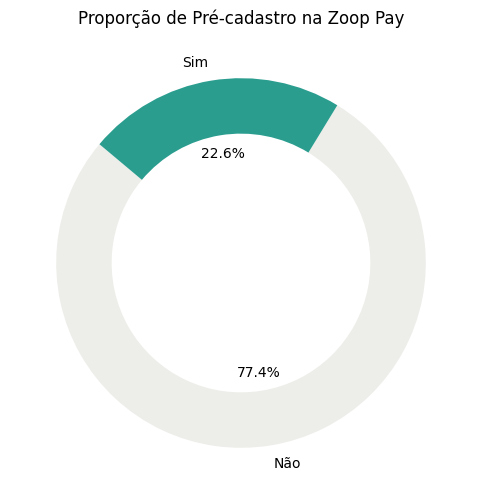

In [8]:
# Contabiliza a quantidade de usuários que realizaram o pré-cadastro na Zoop Pay
pre_cadastro_counts = df['zoop_pay'].value_counts()

# Define as cores para cada valor
colors = ['#2a9d8f' if label == 'Sim' else '#edede9' for label in pre_cadastro_counts.index]

# Cria o gráfico de rosca
plt.figure(figsize=(8, 6))
plt.pie(pre_cadastro_counts, labels=pre_cadastro_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))

# Adiciona um título ao gráfico
plt.title('Proporção de Pré-cadastro na Zoop Pay')

# Exibe o gráfico
plt.show()

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos construir um **boxplot** para representar a **distribuição das idades dos clientes por região**, utilizando o DataFrame **"df"**.  

Os dados estão organizados nas seguintes colunas:  
- **regiao** → Indica a localização dos clientes.  
- **idade** → Representa a idade dos compradores.  

### **Requisitos do gráfico**  
- O **eixo X** deve exibir **as idades** dos clientes.  
- O **eixo Y** deve representar **as regiões** onde as compras foram realizadas.  
- Utilizar bibliotecas de visualização de dados do Python, como **Seaborn e Matplotlib**, para criar um **boxplot** intuitivo e informativo.  

Essa análise permitirá identificar padrões etários por região, ajudando a empresa a traçar perfis demográficos dos clientes.


C:\Users\victo\AppData\Local\Temp\ipykernel_9184\4214670657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='idade', y='regiao', data=df, palette="colorblind")  # Cria o boxplot


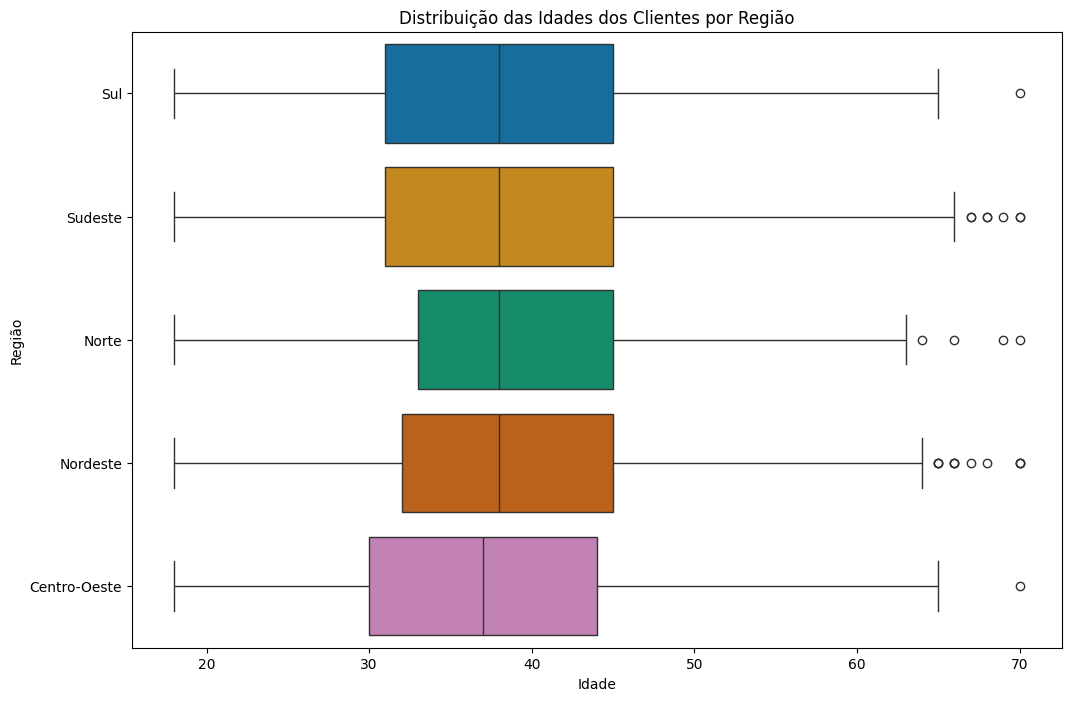

In [9]:
import seaborn as sns

# Criação do boxplot
plt.figure(figsize=(12, 8))  # Define o tamanho do gráfico
boxplot = sns.boxplot(x='idade', y='regiao', data=df, palette="colorblind")  # Cria o boxplot

# Adiciona títulos e rótulos aos eixos
plt.title('Distribuição das Idades dos Clientes por Região')  # Título do gráfico
plt.xlabel('Idade')  # Rótulo do eixo X
plt.ylabel('Região')  # Rótulo do eixo Y

# Exibe o gráfico
plt.show()

## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [10]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos aprimorar o **gráfico de faturamento por região**, ajustando-o conforme a **identidade visual da Zoop** para um acabamento mais profissional e alinhado ao relatório da empresa.  

### **Ajustes necessários:**  
- **Plano de fundo:** tanto a figura quanto a área do plot devem estar na cor **CINZA_1**.  
- **Colunas do gráfico:** utilizar a cor **AQUA_1** para manter a identidade visual.  
- **Dimensões da figura:** ajustar para **(10, 6)** para melhor apresentação dos dados.  
- **Título:** definir como _"Faturamento por Região em 2023"_, com **tamanho 18** e cor **CINZA_5**.  
- **Rótulos:**  
  - **Excluir** rótulos do eixo Y (**yticks**) e labels dos eixos (**xlabel e ylabel**).  
  - **Eixo X:** os rótulos (**xticks**) devem ser **tamanho 12** e **cor AZUL_1**.  
- **Bordas:** eliminar todas para um visual mais limpo.  
- **Valores sobre as colunas:**  
  - Exibir o faturamento total acima de cada coluna no formato: **"R$ valor M"**.  
  - O valor deve ser dividido por **1 milhão (1e6)**, com **1 casa decimal**.  
  - O texto deve ser na cor **AZUL_1**, com **tamanho 12**.  

Utilize as **bibliotecas de visualização de dados do Python** para garantir que os ajustes sejam aplicados corretamente.

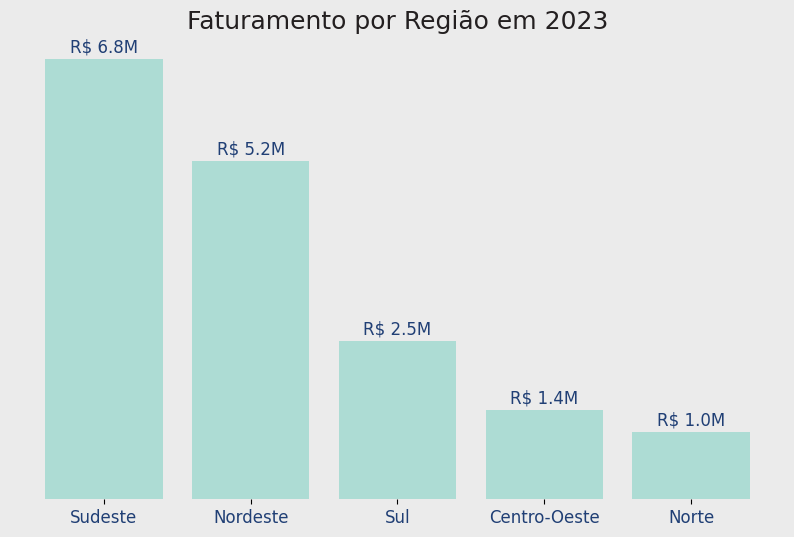

In [11]:
# Exemplo de dados agrupados por região e soma do faturamento
# faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordenação dos dados para melhor visualização (supondo que os dados já estejam preparados)
# faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Configurações gerais da figura
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
plt.gca().set_facecolor(CINZA_1) # Configuração do fundo do plot

# Criação do gráfico de colunas
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento']/1e6, color=AQUA_1)
plt.title('Faturamento por Região em 2023', color=CINZA_5, fontsize=18)
plt.yticks([])  # Remoção dos rótulos do eixo y
plt.ylabel('')  # Remoção do label do eixo y
plt.xticks(fontsize=12, color=AZUL_1)
plt.box(False)  # Remoção das bordas do gráfico

# Adiciona o total do faturamento acima de cada coluna
for index, value in enumerate(faturamento_por_regiao['faturamento']):
    plt.text(index, value/1e6 + 0.1, f'R$ {value/1e6:.1f}M', color=AZUL_1, ha='center', fontsize=12)

# Exibe o gráfico
plt.show()

#### Desafio 2:

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos aprimorar o **gráfico de rosca**, garantindo que siga a **identidade visual da Zoop** para um design mais consistente e impactante.  

### **Ajustes necessários:**  
- **Plano de fundo:** tanto a figura quanto a área do plot devem estar na cor **CINZA_1**.  
- **Fatias do gráfico:**  
  - A fatia correspondente a **"Não"** deve ser exibida na cor **CINZA_3**.  
  - A fatia correspondente a **"Sim"** deve ser destacada na cor **AZUL_3**.  
- **Dimensões da figura:** ajustar para **(6, 6)** para um formato mais compacto.  
- **Título:** definir como _"Pré-cadastrado(a) na Zoop Pay?"_, com **tamanho 18** e cor **CINZA_5**.  
- **Rótulos das fatias:**  
  - Devem ter **tamanho 12** e a **mesma cor das fatias**.  
- **Porcentagens:**  
  - Exibir na **cor BRANCO**, em **negrito**, com **tamanho 12**.  
- **Configurações da rosca:**  
  - **Largura da rosca** (_wedgeprops_): **0.4**.  
  - **Posição das porcentagens dentro da fatia** (_pctdistance_): **0.8**.  
  - **Ângulo de início** (_startangle_): **180**.  
  - **Sem explosão de fatias**, garantindo um design mais limpo e focado.  

Utilize **bibliotecas de visualização de dados do Python**, como **Matplotlib**, para implementar esses refinamentos com precisão.


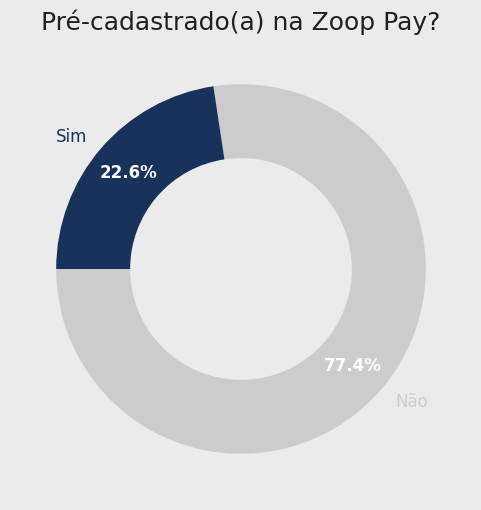

In [ ]:
import matplotlib.pyplot as plt

# Contabiliza a quantidade de usuários que realizaram o pré-cadastro na Zoop Pay
# pre_cadastro_counts = df['zoop_pay'].value_counts()

# Define as cores para cada valor
colors = [AZUL_3 if label == 'Sim' else CINZA_3 for label in pre_cadastro_counts.index]

# Cria o gráfico de rosca
plt.figure(figsize=(6, 6), facecolor=CINZA_1)
plt.gca().set_facecolor(CINZA_1)    # Altera a cor do fundo do plot
patches, texts, autotexts = plt.pie(pre_cadastro_counts, labels=pre_cadastro_counts.index, autopct='%1.1f%%', startangle=180,  
                                    colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)

# Adiciona o título com a cor e tamanho especificados
plt.title('Pré-cadastrado(a) na Zoop Pay?', color=CINZA_5, fontsize=18)

# Configura as cores e tamanhos dos rótulos das fatias e porcentagens
for text, autotext, color in zip(texts, autotexts, [CINZA_3, AZUL_3]):
    text.set_color(color) # Define a cor do rótulo da fatia igual à cor da fatia
    text.set_fontsize(12)
    autotext.set_color(BRANCO)  # Define a cor das porcentagens como branco
    autotext.set_weight('bold')  # Define o texto das porcentagens em negrito
    autotext.set_fontsize(12)

# Exibe o gráfico
plt.show() 